## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.AfterStatePlayer import ASPlayer
from tic_tac_toe.AfSt import ASPlayer2
from tic_tac_toe.SymmetricTabularQPlayer import SYMTQPlayer
from tic_tac_toe.SymmetricAfterStatePlayer import SYM_ASPlayer
from tic_tac_toe.AfterStateTabularQPlayer import TQ_ASPlayer
from tic_tac_toe.SymmetricAfterStateTabularQPlayer import SYM_TQ_ASPlayer



from util import battle, battle_2, battle_1

### 2.2. Creation of the function eval_player

This function performs some battles between two players (each battle has a certain number of games, 100 by default), and for each battle the function output in percenetage the ratio of victory of each player and the ratio of draw according to the number of games. And output everything as a plot.

In [2]:
def eval_players(p1 : Player, p2 : Player,  num_battles = 100, num_games_train = 10, num_games_eval = 100,loc='best'):
    """In this function the players are trained during a certian episode of games"""
    p1_wins = []
    p2_wins = []
    draws = []
    count = []

    for i in range(num_battles):
        p1win, p2win, draw = battle_1(p1, p2,num_games_eval, True)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        count.append(i)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        count.append((i+1))

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='{} wins'.format(play1))
    plt.plot(count, p2_wins, 'b-', label='{} wins'.format(play2))
    plt.legend( shadow=True, fancybox=True, framealpha =0.7,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [3]:
def eval_players_2(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    """In this function players are trained if only if they are the same kind """
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    
    global play1
    global play2

    for i in range(num_battles):
        p1win, p2win, draw = battle_2(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)
    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='{} wins'.format(play1))
    plt.plot(count, p2_wins, 'b-', label='{} wins'.format(play2))
    plt.legend(shadow=True, fancybox=True, framealpha =0.7,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Experiments of the AS Player using the update rule $V(S_t) \leftarrow V(S_t)+ \alpha [R_{t+1}+\gamma V(S_{t+1})-V(S_t)]$

We considered $R_{t+1} = 0$

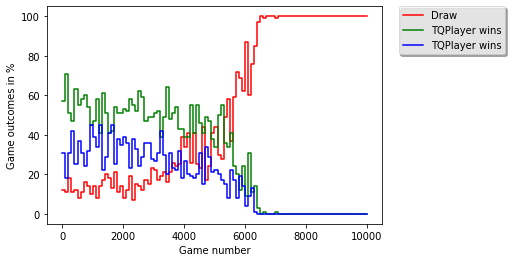

In [4]:
player1 = TQPlayer()
play1 = 'TQPlayer'
player2 =  TQPlayer()
play2 = 'TQPlayer'
eval_players_2(player1, player2, 100)

# 1.  $\gamma = 0.95$

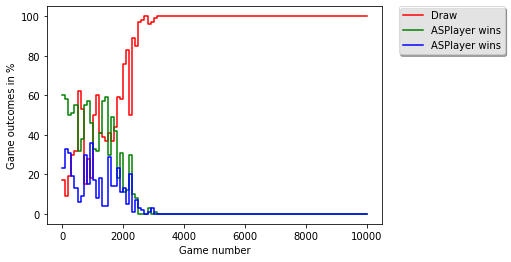

In [5]:
player1 = ASPlayer(gamma = 0.95)
play1 = 'ASPlayer'
player2 =  ASPlayer(gamma = 0.95)
play2 = 'ASPlayer'
eval_players_2(player1, player2, 100)

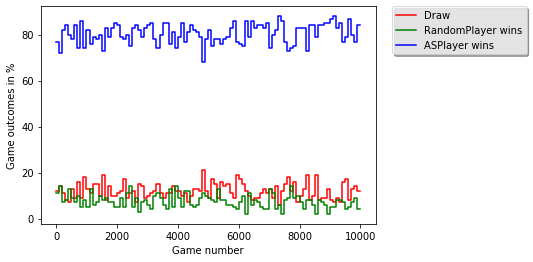

In [6]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

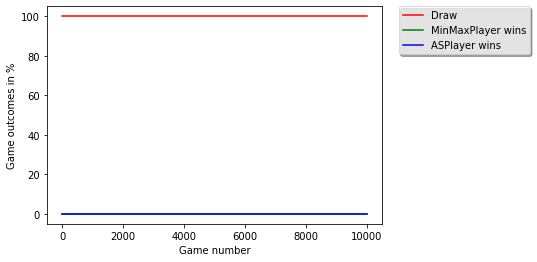

In [7]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

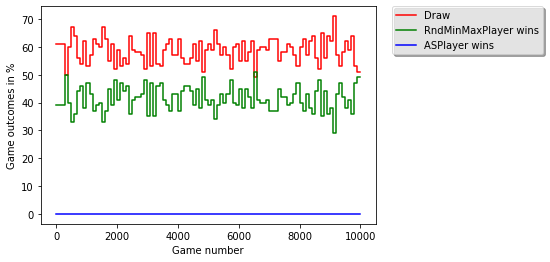

In [8]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

### Observation

Tha AS Player is reaching faster the optimally by self training but it was just suffisant for the MinMax player, for the Random Player and Random Minmax Player it wasn't enough

# 2. $\gamma = 0.85$

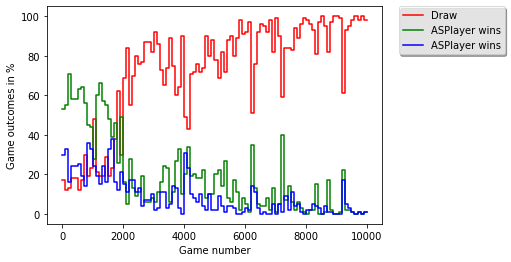

In [9]:
player1 = ASPlayer(gamma = 0.85)
play1 = 'ASPlayer'
player2 =  ASPlayer(gamma = 0.85)
play2 = 'ASPlayer'
eval_players_2(player1, player2, 100)

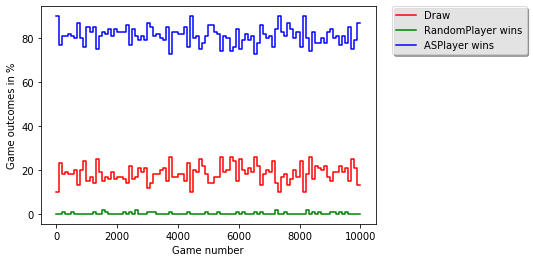

In [10]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

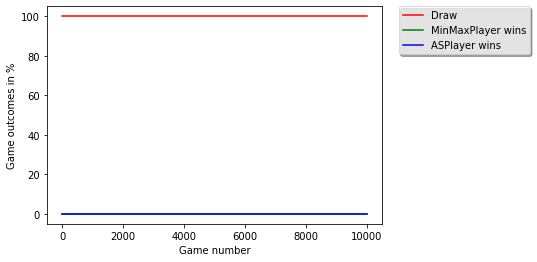

In [11]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

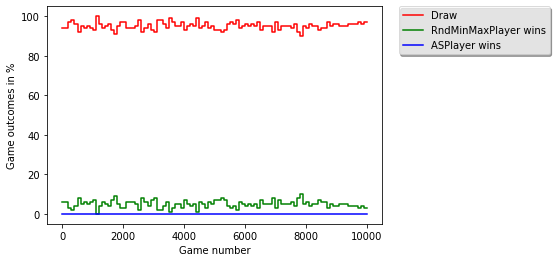

In [12]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

### Observation

It didn't reach the optimallity after 10000 games. But it improves its skills against the Rd Player and the Rd MiniMax Player

# 3. $\gamma = 0.8$

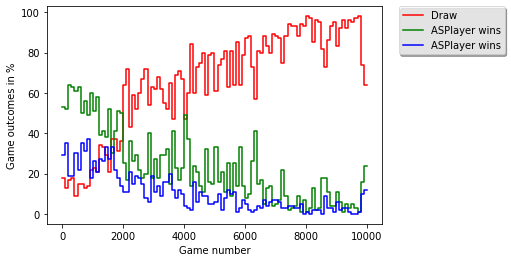

In [13]:
player1 = ASPlayer(gamma = 0.8)
play1 = 'ASPlayer'
player2 =  ASPlayer(gamma = 0.8)
play2 = 'ASPlayer'
eval_players_2(player1, player2, 100)

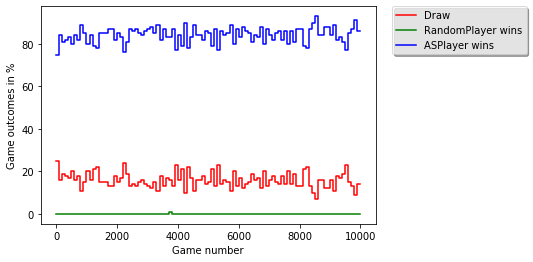

In [14]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

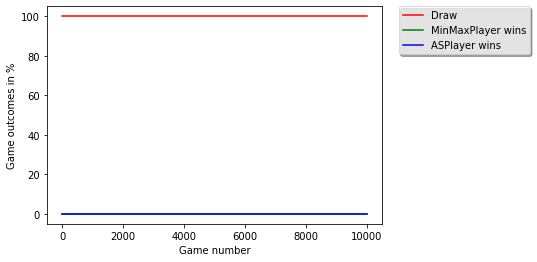

In [15]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

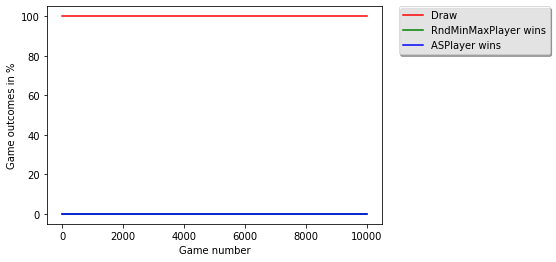

In [16]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

### Observation

It like previously didn't reach the optimmality against itself after 10000 games but now it learnt to never loose against the 3 others players.

# Training with others


### Here the players is training while playing with other kinds of players

We start by an overview of the standard TQ-Player 

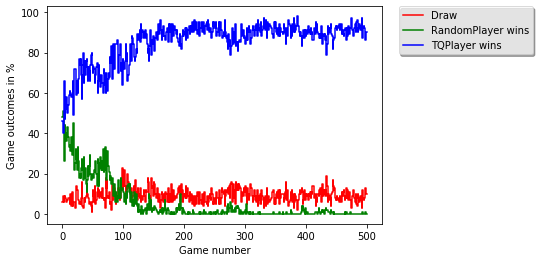

In [18]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
player2 =  TQPlayer()
play2 = 'TQPlayer'
eval_players(player1, player2, 500)

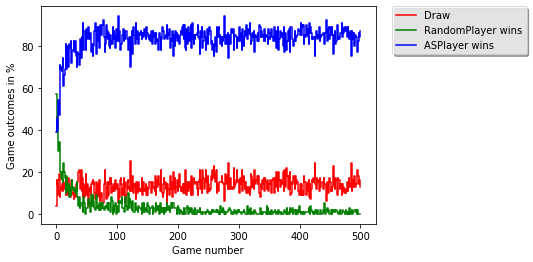

In [19]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
player2 =  ASPlayer(alpha = 0.8)
play2 = 'ASPlayer'
eval_players(player1, player2, 500)

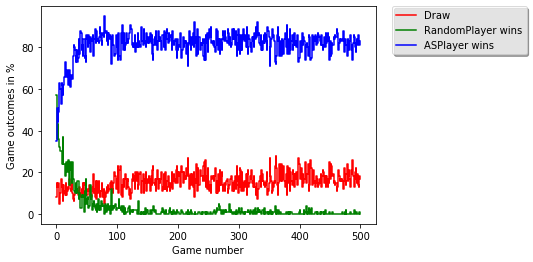

In [20]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
player2 =  ASPlayer(alpha = 0.8,epsilon = 0.1, decay = 0.0001)
play2 = 'ASPlayer'
eval_players(player1, player2, 500)

We notice that after the After_Sate Player finds soonly a better strategy but after a long run stop to improves while the TQ Player keep improving

### Against the MinMax Player

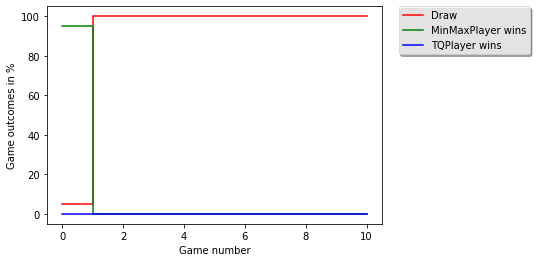

In [21]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
player2 =  TQPlayer()
play2 = 'TQPlayer'
eval_players(player1, player2, 10)

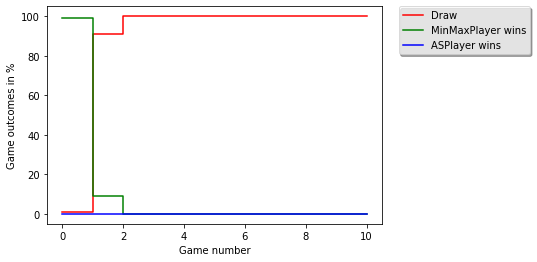

In [22]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
player2 =  ASPlayer()
play2 = 'ASPlayer'
eval_players(player1, player2, 10)

Against the Minmax the TQ Player finds the optimal strategy faster

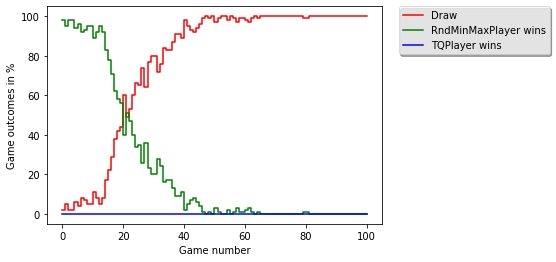

In [23]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
player2 =  TQPlayer()
play2 = 'TQPlayer'
eval_players(player1, player2, 100)

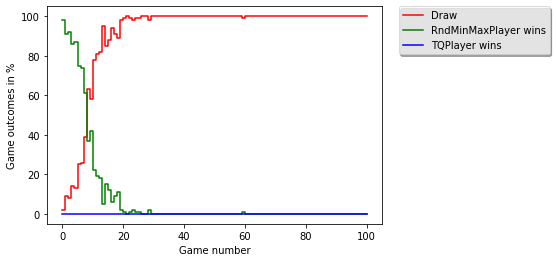

In [24]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
player2 =  ASPlayer()
play2 = 'TQPlayer'
eval_players(player1, player2, 100)

Against the Random Minmax the After State Player finds the optimal strategy faster than the TQ Player

# Symmetry after State

### Let see how the symmetic after state player behaves when training with itself and get evaluate with other players

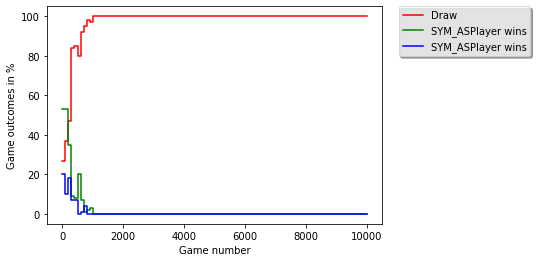

In [14]:
player1 = SYM_ASPlayer(gamma = 0.95)
play1 = 'SYM_ASPlayer'
player2 =  SYM_ASPlayer(gamma = 0.95)
play2 = 'SYM_ASPlayer'
eval_players_2(player1, player2, 100)

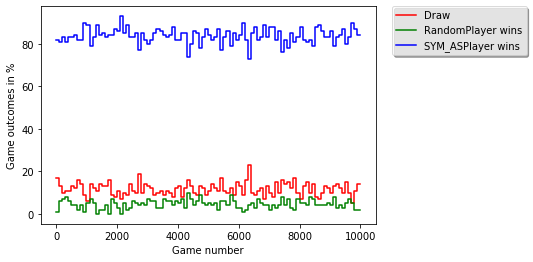

In [6]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

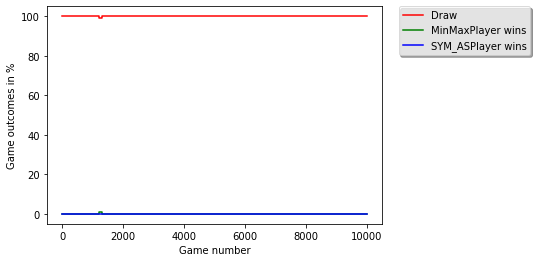

In [15]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

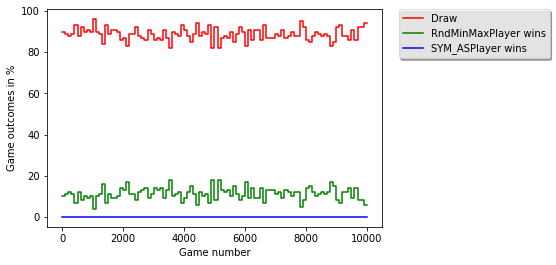

In [17]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

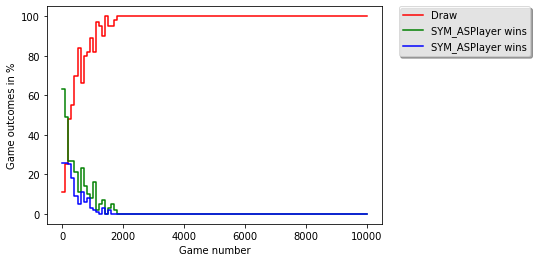

In [18]:
player1 = SYM_ASPlayer(gamma = 0.85)
play1 = 'SYM_ASPlayer'
player2 =  SYM_ASPlayer(gamma = 0.85)
play2 = 'SYM_ASPlayer'
eval_players_2(player1, player2, 100)

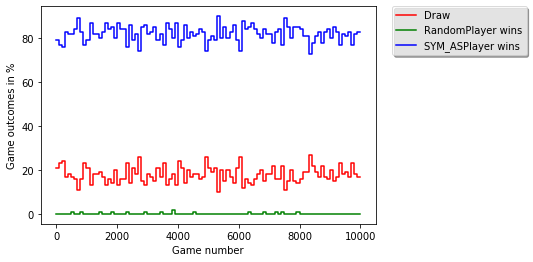

In [8]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

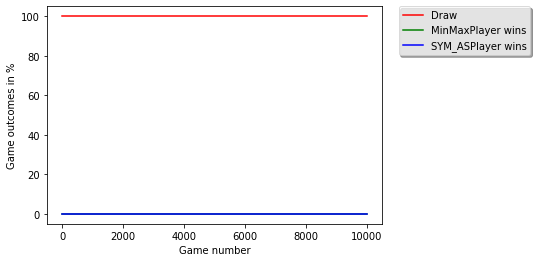

In [19]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

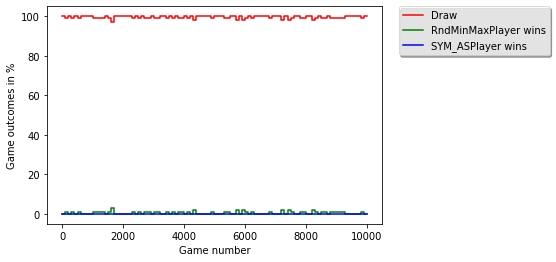

In [20]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

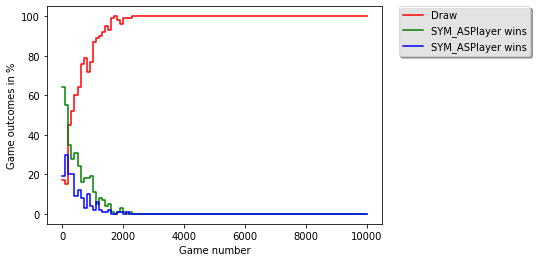

In [21]:
player1 = SYM_ASPlayer(gamma = 0.8)
play1 = 'SYM_ASPlayer'
player2 =  SYM_ASPlayer(gamma = 0.8)
play2 = 'SYM_ASPlayer'
eval_players_2(player1, player2, 100)

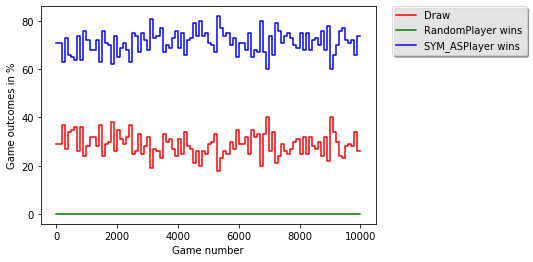

In [13]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
eval_players_2(player1, player2, 100)

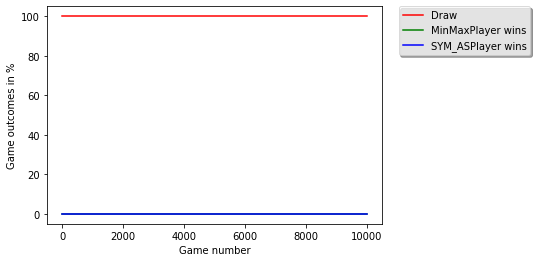

In [22]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
eval_players_2(player1, player2, 100)

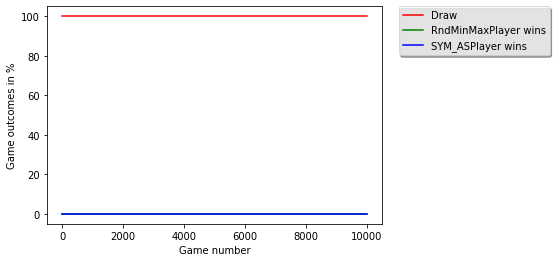

In [23]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
eval_players_2(player1, player2, 100)

We notice that using symetry and with the appropriate discount factor the Symmetric After State Player finds faster the optimal strategy than the standard after state player and the standard TQ Player

### Let see the behavior of the  Symmetric After State Player when its training during a game with other kind of players

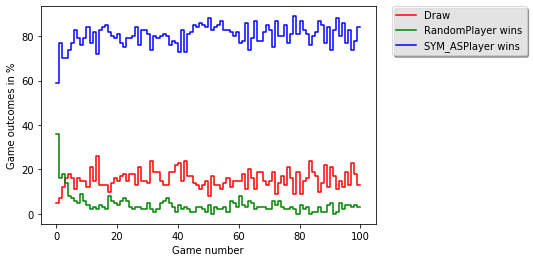

In [25]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
player2 =  SYM_ASPlayer()
play2 = 'SYM_ASPlayer'
eval_players(player1, player2, 100)

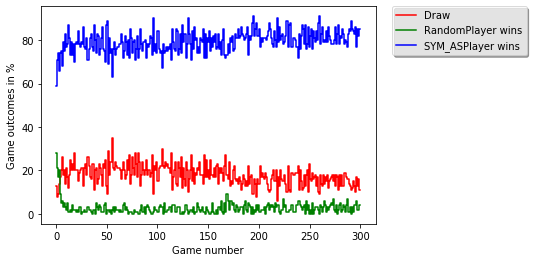

In [26]:
player1 = RandomPlayer()
play1 = 'RandomPlayer'
player2 =  SYM_ASPlayer(gamma = 0.8)
play2 = 'SYM_ASPlayer'
eval_players(player1, player2, 300)

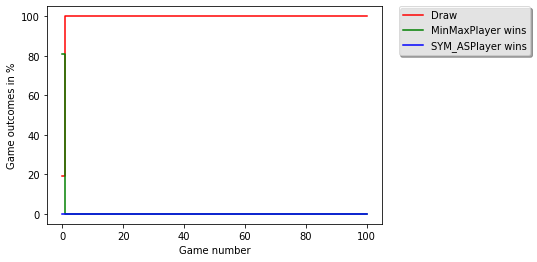

In [32]:
player1 = MinMaxAgent()
play1 = 'MinMaxPlayer'
player2 =  SYM_ASPlayer()
play2 = 'SYM_ASPlayer'
eval_players(player1, player2, 100)

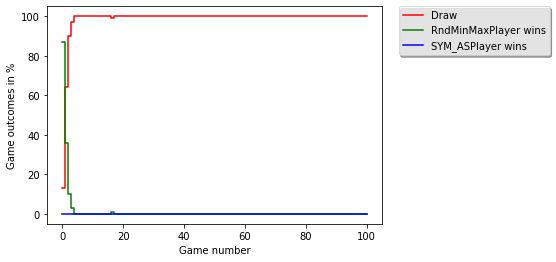

In [31]:
player1 = RndMinMaxAgent()
play1 = 'RndMinMaxPlayer'
player2 =  SYM_ASPlayer(gamma = 0.95)
play2 = 'SYM_ASPlayer'
eval_players(player1, player2, 100)

# Conclusion

By doing an overall conclusion, the performance of the afterstate player is improved when using simmilarity structure of during during the training and perform better than the TD(0) and the TQ Player. But its robustness depends also on initial paramters such as the dicount factor $\gamma$